In [16]:
import pandas as pd
import requests as rs
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as soup

In [17]:
# Initialize Chrome webdriver
driver = webdriver.Chrome()  # You can use any other webdriver as per your preference
base_url = "https://nuforc.org/subndx/?id=all"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract table data
    table = soup.find('table')
    if not headers:  # Fetch headers only once
        headers = [th.text.strip() for th in table.find_all('th')]
    
    # Extract data rows
    data_rows = table.find_all('tr')[1:]  # Skip header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns
    
    # Check for the presence of next button
    next_button = driver.find_element(By.ID, "table_1_next")
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled
    
    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()

# Now you have all the data collected from all pages


In [18]:
# #TRIAL 2, ALL COLUMNS, LESS DATA 101 ROWS
# # Initialize Chrome webdriver
# driver = webdriver.Chrome()  # You can use any other webdriver as per your preference
# base_url = "https://nuforc.org/subndx/?id=all"
# driver.get(base_url)

# # Initialize lists to store headers and data
# headers = []
# data = []

# while True:
#     # Get the current page HTML
#     html = driver.page_source
#     soup = BeautifulSoup(html, 'html.parser')
    
#     # Extract table data
#     table = soup.find('table')
#     if not headers:  # Fetch headers only once
#         headers = [th.text.strip() for th in table.find_all('th')]
    
#     # Extract data rows
#     data_rows = table.find_all('tr')[1:]  # Skip header row
#     for row in data_rows:
#         data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns
    
#     # Check for the presence of next button
#     next_button = driver.find_element(By.ID, "table_1_next")
#     if 'disabled' in next_button.get_attribute('class'):
#         break  # Break loop if next button is disabled
    
#     # Click the next button
#     next_button.click()

# # Close the webdriver
# driver.quit()

# # Now you have all the data collected from all pages


In [19]:
#TRIAL 1, MORE DATA BUT NOT ALL HEADERS/COLUMNS, 900+ ROWS
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from bs4 import BeautifulSoup

# # Initialize Chrome webdriver
# driver = webdriver.Chrome()  # You can use any other webdriver as per your preference
# base_url = "https://nuforc.org/subndx/?id=all"
# driver.get(base_url)

# # Initialize lists to store headers and data
# headers = []
# data = []

# while True:
#     # Get the current page HTML
#     html = driver.page_source
#     soup = BeautifulSoup(html, 'html.parser')
    
#     # Extract table data
#     table = soup.find('table')
#     if not headers:  # Fetch headers only once
#         headers = [th.text.strip() for th in table.find_all('th')]
    
#     # Extract data rows
#     data_rows = table.find_all('tr')[1:]  # Skip header row
#     for row in data_rows:
#         data.append([td.text.strip() for td in row.find_all('td')])
    
#     # Check for the presence of next button
#     next_button = driver.find_element(By.ID, "table_1_next")
#     if 'disabled' in next_button.get_attribute('class'):
#         break  # Break loop if next button is disabled
    
#     # Click the next button
#     next_button.click()

# # Close the webdriver
# driver.quit()

# # Now you have all the data collected from all pages


In [20]:
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Media
0,Open,03/12/2024 20:20,,,Unspecified,Orb,3 bright orange orbs in a line would fade out ...,
1,Open,03/12/2024 19:50,Călan,Hunedoara,Romania,Other,"At night, it was made out of multiple ""light o...",
2,Open,03/12/2024 11:00,Platteville,WI,USA,Changing,5 Crafts in Formation,
3,Open,03/12/2024 04:40,Fort Smith,AR,USA,Unknown,Immediately after watching Space X Dragon flew...,
4,Open,03/11/2024 22:11,Oscoda,MI,USA,Fireball,"Stunningly well-defined ball of white, green a...",


In [24]:
df.tail()

,Occurred,City,State,Country,Shape,Summary
227952,11/28/2023 13:43,North East,PA,USA,Orb,Seen on 95 south in northeast philly
227953,11/28/2023 06:18,San Francisco,CA,USA,Disk,I decided to film the morning sky and saw with...
227954,11/28/2023 06:13,New Lenox,IL,USA,Circle,Bright deep yellow sphere with red bottom with...
227955,11/28/2023 00:30,,Yucatan,Mexico,Diamond,Went to room to sit on balcony and spotted bri...
227956,,,,,,


In [25]:
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media'])
df.head()

,Occurred,City,State,Country,Shape,Summary
0,03/12/2024 20:20,,,Unspecified,Orb,3 bright orange orbs in a line would fade out ...
1,03/12/2024 19:50,Călan,Hunedoara,Romania,Other,"At night, it was made out of multiple ""light o..."
2,03/12/2024 11:00,Platteville,WI,USA,Changing,5 Crafts in Formation
3,03/12/2024 04:40,Fort Smith,AR,USA,Unknown,Immediately after watching Space X Dragon flew...
4,03/11/2024 22:11,Oscoda,MI,USA,Fireball,"Stunningly well-defined ball of white, green a..."


In [26]:
df.shape

(227957, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227957 entries, 0 to 227956
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Occurred  227957 non-null  object
 1   City      227957 non-null  object
 2   State     227957 non-null  object
 3   Country   227957 non-null  object
 4   Shape     227957 non-null  object
 5   Summary   227957 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [28]:
df.Shape.value_counts()

Orb          45126
Circle       31549
Light        24834
Changing     20271
Unknown      15806
Triangle     13535
Other        11369
Disk         11264
Sphere        6771
Chevron       6771
Flash         6757
Diamond       6750
Cigar         4521
Fireball      4521
Formation     4514
Oval          2285
Cylinder      2264
Rectangle     2264
Egg           2257
              2257
Star          2250
Cube            14
Cross            7
Name: Shape, dtype: int64

In [33]:
df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)

In [34]:
df1 = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

df1.head()

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,03/12/2024,20:20,,,Unspecified,Orb,3 bright orange orbs in a line would fade out ...
1,03/12/2024,19:50,Călan,Hunedoara,Romania,Other,"At night, it was made out of multiple ""light o..."
2,03/12/2024,11:00,Platteville,WI,USA,Changing,5 Crafts in Formation
3,03/12/2024,04:40,Fort Smith,AR,USA,Unknown,Immediately after watching Space X Dragon flew...
4,03/11/2024,22:11,Oscoda,MI,USA,Fireball,"Stunningly well-defined ball of white, green a..."


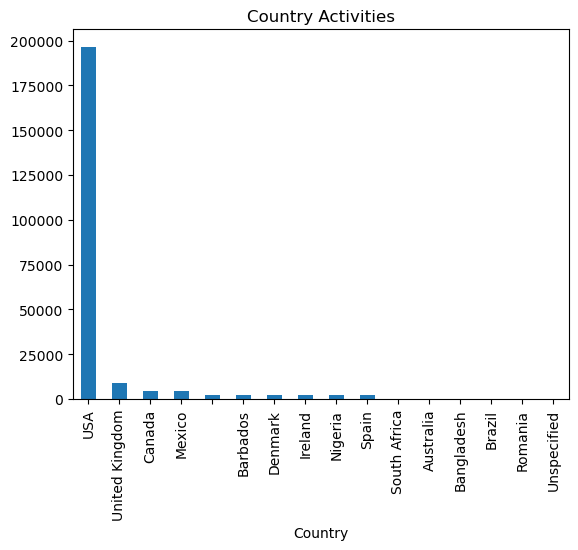

In [38]:
df1.groupby('Country').size().sort_values(ascending=False).plot.bar(title='Country Activities');

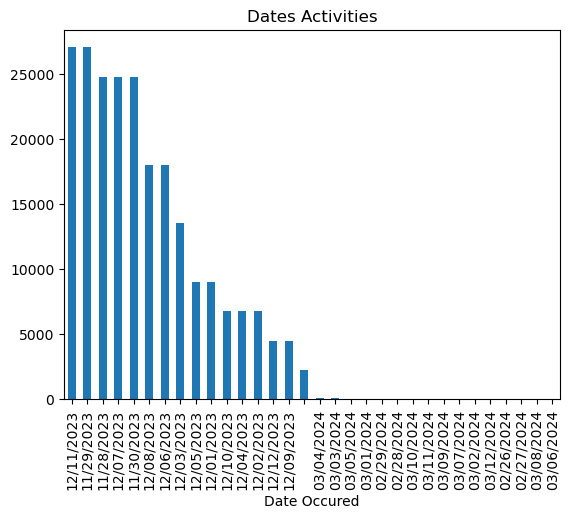

In [35]:
df1.groupby('Date Occured').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

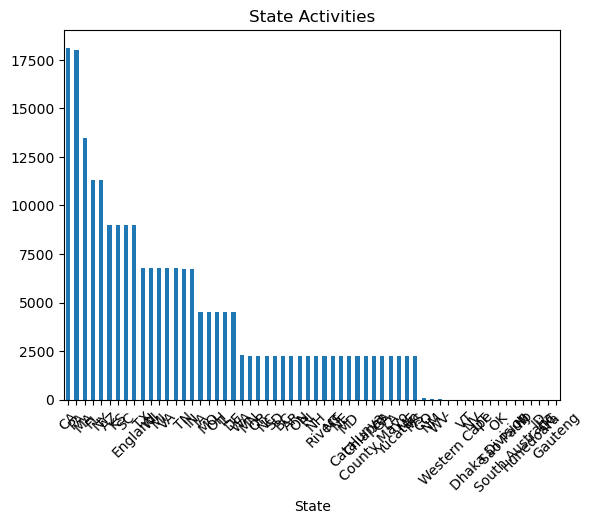

In [37]:
#This takes all states from all countries...
df1.groupby('State').size().sort_values(ascending=False).plot.bar(title='State Activities', rot=45);